In [7]:
import pandas as pd
movies = pd.read_csv("/Users/karthikravi/Documents/Projects/Data Science with Python 1/movies.dat",sep="::",engine="python",quoting=3,names=["Movie ID","Title","Genre"])
users = pd.read_csv("/Users/karthikravi/Documents/Projects/Data Science with Python 1/users.dat",sep="::",engine="python",quoting=3,names=["User ID","Gender","Age","Occupation","Zip-Code"])
ratings = pd.read_csv("/Users/karthikravi/Documents/Projects/Data Science with Python 1/ratings.dat",sep="::",engine="python",quoting=3,names=["User ID","Movie ID","Rating","Timestamp"])


In [13]:
data = pd.merge(movies,ratings,on="Movie ID")
new_data = pd.merge(data,users,on="User ID")
new_data

,Movie ID,Title,Genre,User ID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [16]:
master_data = pd.DataFrame({"Movie ID":new_data["Movie ID"],"Title":new_data["Title"],"User ID":new_data["User ID"],"Age":new_data["Age"],"Gender":new_data["Gender"],"Occupation":new_data["Occupation"],"Rating":new_data["Rating"]})
master_data

,Movie ID,Title,User ID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
1,48,Pocahontas (1995),1,1,F,10,5
2,150,Apollo 13 (1995),1,1,F,10,5
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4
4,527,Schindler's List (1993),1,1,F,10,5
...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),5727,25,M,4,4
1000205,3535,American Psycho (2000),5727,25,M,4,2
1000206,3536,Keeping the Faith (2000),5727,25,M,4,5
1000207,3555,U-571 (2000),5727,25,M,4,3


In [34]:
new=master_data["Age"].value_counts()
new


25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

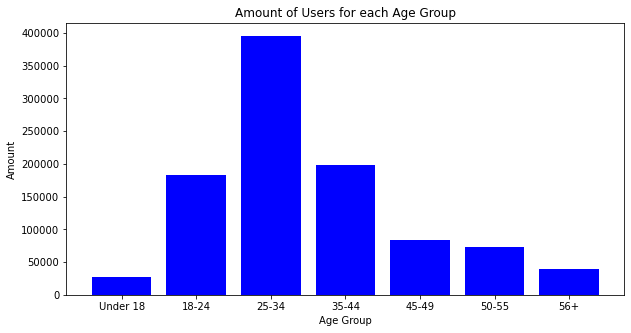

In [40]:
age_distribution = pd.DataFrame({"Age Group":["Under 18","18-24","25-34","35-44","45-49","50-55","56+"],"Amount":[27211,183536,395556,199003,83633,72490,38780]})
age_distribution
import matplotlib.pyplot as plt
different = {"Under 18":27211,"18-24":183536,"25-34":395556,"35-44":199003,"45-49":83633,"50-55":72490,"56+":38780}
keys = list(different.keys())
values = list(different.values())
plt.figure(figsize=(10,5))
plt.bar(keys,values,color="blue",width=0.8)
plt.xlabel("Age Group")
plt.ylabel("Amount")
plt.title("Amount of Users for each Age Group")
plt.show()

Based on the graph, most of the users are in the age group 25-34

In [49]:
group = master_data.groupby("Title")
toy_story = group.get_group("Toy Story (1995)")["Rating"].mean()
print("The mean rating for the movie Toy Story is",toy_story)


The mean rating for the movie Toy Story is 4.146846413095811


In [51]:
groups = master_data.groupby("Title")
ts = group.get_group("Toy Story (1995)")
ts

,Movie ID,Title,User ID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
53,1,Toy Story (1995),6,50,F,9,4
124,1,Toy Story (1995),8,25,M,12,4
263,1,Toy Story (1995),9,25,M,17,5
369,1,Toy Story (1995),10,35,F,1,5
...,...,...,...,...,...,...,...
575166,1,Toy Story (1995),6022,25,M,17,5
575214,1,Toy Story (1995),6025,25,F,1,5
575485,1,Toy Story (1995),6032,45,M,7,4
575589,1,Toy Story (1995),6035,25,F,1,4


In [55]:
result = master_data.sort_values("Rating",ascending=False)
result.head(25)

,Movie ID,Title,User ID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
489283,2858,American Beauty (1999),5070,25,M,2,5
489259,2599,Election (1999),5070,25,M,2,5
489257,2571,"Matrix, The (1999)",5070,25,M,2,5
489256,2551,Dead Ringers (1988),5070,25,M,2,5
489237,2395,Rushmore (1998),5070,25,M,2,5
489236,2391,"Simple Plan, A (1998)",5070,25,M,2,5
489226,2330,Hands on a Hard Body (1996),5070,25,M,2,5
489224,2321,Pleasantville (1998),5070,25,M,2,5
489212,2248,Say Anything... (1989),5070,25,M,2,5


In [62]:
user = master_data.groupby("User ID")
ids = user.get_group(2696)
ids

,Movie ID,Title,User ID,Age,Gender,Occupation,Rating
991035,350,"Client, The (1994)",2696,25,M,7,3
991036,800,Lone Star (1996),2696,25,M,7,5
991037,1092,Basic Instinct (1992),2696,25,M,7,4
991038,1097,E.T. the Extra-Terrestrial (1982),2696,25,M,7,3
991039,1258,"Shining, The (1980)",2696,25,M,7,4
991040,1270,Back to the Future (1985),2696,25,M,7,2
991041,1589,Cop Land (1997),2696,25,M,7,3
991042,1617,L.A. Confidential (1997),2696,25,M,7,4
991043,1625,"Game, The (1997)",2696,25,M,7,4
991044,1644,I Know What You Did Last Summer (1997),2696,25,M,7,2


In [126]:
unique = new_data["Genre"].str.split("|",expand=True).stack().reset_index(level=1,drop=True)
unique.values

array(['Animation', "Children's", 'Comedy', ..., 'Thriller', 'Action',
       'Drama'], dtype=object)

In [89]:
updated_new_data = pd.DataFrame({"Movie ID":new_data["Movie ID"],"Title":new_data["Title"],"Genre":new_data["Genre"],"User ID":new_data["User ID"],"Rating":new_data["Rating"],"Timestamp":new_data["Timestamp"],"Gender":new_data["Gender"],"Age":new_data["Age"],"Occupation":new_data["Occupation"],"Zip Code":new_data["Zip-Code"]})
updated_new_data.

,Movie ID,Title,Genre,User ID,Rating,Timestamp,Gender,Age,Occupation,Zip Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [138]:
file = pd.DataFrame({"Genre":unique.values},index=[unique.index])
file.pivot_table(index=[unique.index],columns=[unique.values],aggfunc=[len],fill_value=0)

len                                                                \
         Genre                                                                 
        Action Adventure Animation Children's Comedy Crime Documentary Drama   
0            0         0         1          1      1     0           0     0   
1            0         0         1          1      0     0           0     0   
2            0         0         0          0      0     0           0     1   
3            1         1         0          0      0     0           0     0   
4            0         0         0          0      0     0           0     1   
...        ...       ...       ...        ...    ...   ...         ...   ...   
1000204      0         0         0          0      0     0           0     1   
1000205      0         0         0          0      1     0           0     0   
1000206      0         0         0          0      1     0           0     0   
1000207      1         0         0          0      0     0           0     0   
1000208      1         0         0          0      0     0           0     1   

                                                                              \
                                                                               
        Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Thriller War   
0             0         0      0       0       0       0      0        0   0   
1             0         0      0       1       0       1      0        0   0   
2             0         0      0       0       0       0      0        0   0   
3             1         0      0       0       0       0      1        0   0   
4             0         0      0       0       0       0      0        0   1   
...         ...       ...    ...     ...     ...     ...    ...      ...  ..   
1000204       0         0      0       0       0       0      0        1   0   
1000205       0         0      1       0       0       0      0        1   0   
1000206       0         0      0       0       0       1      0        0   0   
1000207       0         0      0       0       0       0      0        1   0   
1000208       0         0      0       0       0       0      0        0   0   

                 
                 
        Western  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
1000204       0  
1000205       0  
1000206       0  
1000207       0  
1000208       0  

[1000209 rows x 18 columns]

In [148]:
def gender(types):
    if types == "M":
        return 1
    else:
        return 2


In [154]:
different = new_data["Gender"].map(gender)
updated_new_data["Gender Number"] = different
updated_new_data

,Movie ID,Title,Genre,User ID,Rating,Timestamp,Gender,Age,Occupation,Zip Code,Gender Number
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,2
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,2
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,2
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,2
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,2
...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,1
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,1
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,1
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,1


In [163]:
end = pd.DataFrame({"Movie ID":new_data["Movie ID"],"Title":new_data["Title"],"Genre":new_data["Genre"],"User ID":new_data["User ID"],"Rating":new_data["Rating"],"Timestamp":new_data["Timestamp"],"Gender":updated_new_data["Gender Number"],"Age":new_data["Age"],"Occupation":new_data["Occupation"],"Zip Code":new_data["Zip-Code"]})
end

,Movie ID,Title,Genre,User ID,Rating,Timestamp,Gender,Age,Occupation,Zip Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,2,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,2,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,2,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,2,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,2,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,1,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,1,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,1,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,1,25,4,92843


In [161]:
x_feature = end[["User ID","Gender","Age","Occupation"]]
y_target = end[["Rating"]]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
linereg = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x_feature,y_target)
linereg.fit(x_train,y_train)
y_pred = linereg.predict(x_test)
y_pred

array([[3.49144303],
       [3.64825019],
       [3.60170912],
       ...,
       [3.54111512],
       [3.5569063 ],
       [3.56975426]])

In [166]:
from sklearn import metrics
metrics.mean_absolute_error(y_pred,y_test)

0.930106731908553